In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

In [2]:
#read in data

combine_data = pd.read_csv("combine_data_2000_2020.csv", encoding= 'unicode_escape')
combine_data.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1.0,23.0


In [3]:
#look at data types of each column
combine_data.dtypes

Player        object
Pos           object
Ht             int64
Wt             int64
Forty        float64
Vertical     float64
BenchReps    float64
BroadJump    float64
Cone         float64
Shuttle      float64
Year           int64
Team          object
Round        float64
Pick         float64
dtype: object

In [4]:
#get rid of spaces in year column and change to integer
combine_data['Year'] = pd.to_numeric(combine_data['Year'])

#get rid of special teams positions that were drafted
off_def = combine_data.loc[~((combine_data.Pos == 'K') | (combine_data.Pos == 'P') |\
                                                                      (combine_data.Pos == 'LS'))]
off_def.Pos.unique()

array(['OLB', 'RB', 'OT', 'TE', 'CB', 'FS', 'OG', 'ILB', 'EDGE', 'SS',
       'DT', 'QB', 'WR', 'C', 'FB', 'S', 'LB', 'OL', 'DL'], dtype=object)

In [5]:
conditions = [
    (off_def.Round.isna() == True),
    (off_def.Round.isna() == False)]
choices = [0,1]
off_def['drafted'] = np.select(conditions, choices, default = None)
off_def.head()

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick,drafted
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1.0,13.0,1
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1.0,19.0,1
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6.0,188.0,1
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,0
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1.0,23.0,1


In [6]:
#convert new column to int

off_def['drafted'] = off_def["drafted"].astype(int)
off_def.dtypes

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Player        object
Pos           object
Ht             int64
Wt             int64
Forty        float64
Vertical     float64
BenchReps    float64
BroadJump    float64
Cone         float64
Shuttle      float64
Year           int64
Team          object
Round        float64
Pick         float64
drafted        int32
dtype: object

In [7]:
#Look at percent of NaN values in every column

percent_missing = off_def.isnull().sum() * 100 / len(off_def)
missing_value_df = pd.DataFrame({'column_name': off_def.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Player,Player,0.000000
Pos,Pos,0.000000
Ht,Ht,0.000000
Wt,Wt,0.000000
Forty,Forty,3.910951
Vertical,Vertical,20.442238
BenchReps,BenchReps,29.933815
BroadJump,BroadJump,21.224428
Cone,Cone,34.702166
Shuttle,Shuttle,33.408544


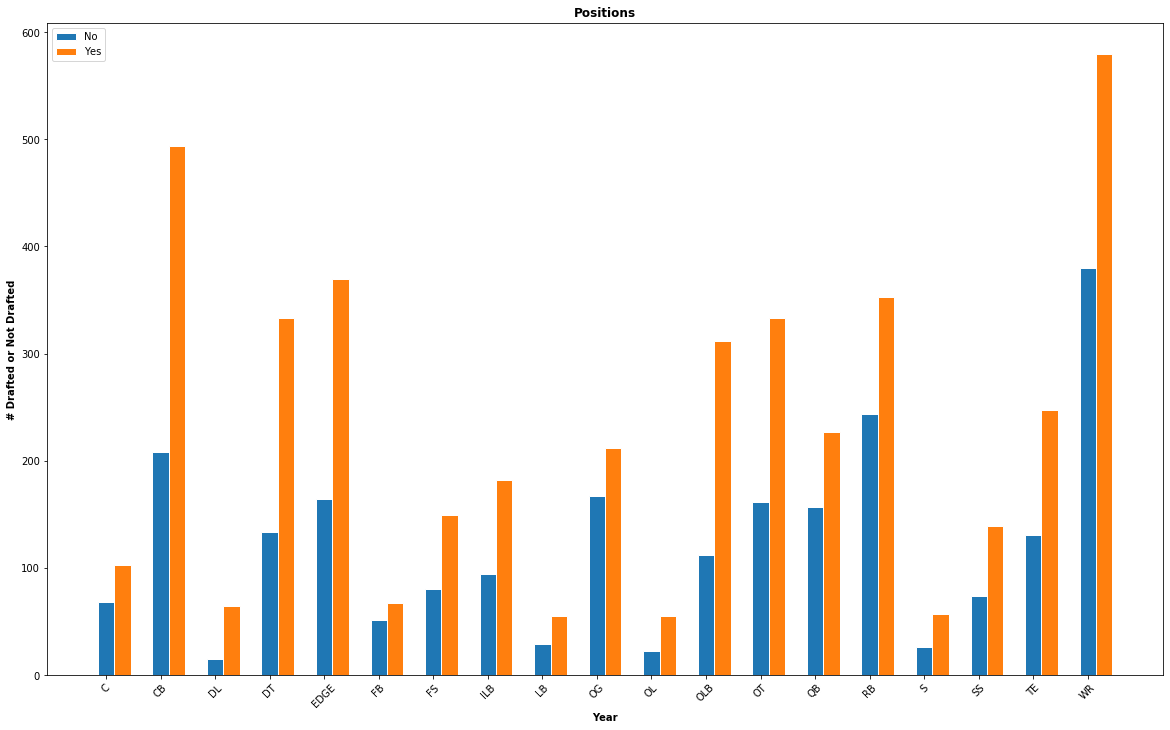

In [8]:
#Look at players invited to the combine who were drafted and not drafted by positions
drafted_pos = off_def.groupby(["Pos",'drafted'])['drafted'].count().unstack()

#create fig
fig, ax = plt.subplots(figsize=(20,12))

# set width of bar
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(len(drafted_pos[0]))
r2 = [x + barWidth for x in r1]

#plot the different counts of No or Yes on the fig + ax
plt.bar(r1, drafted_pos[0], width=barWidth, edgecolor='white', label='No')
plt.bar(r2, drafted_pos[1], width=barWidth, edgecolor='white', label='Yes')

#make a list of seasons to put in the graph tick labels
positions = list(drafted_pos.index.values)

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks(np.arange(len(drafted_pos[0])), positions, rotation = 45)
plt.ylabel('# Drafted or Not Drafted', fontweight = 'bold')
plt.title("Positions", \
         fontweight = 'bold')
plt.legend(title = "Drafted")

plt.legend()
plt.show()

In [9]:
#create separate df that excludes players with missing info, which will be roughly one half
numeric = off_def[['Forty',"Vertical","BroadJump","BenchReps","Cone","Shuttle",'drafted']]

not_missing = numeric.dropna(axis = 0)
not_missing.shape

(3130, 7)

In [10]:
#look at point biserial coefficient
#used to mesaure correlation between continuous and binary variable
from scipy.stats import pointbiserialr

forty = not_missing.Forty
vert = not_missing.Vertical
bench = not_missing.BenchReps
broad = not_missing.BroadJump
cone = not_missing.Cone
shuttle = not_missing.Shuttle
drafted = not_missing.drafted

print(pointbiserialr(forty, drafted))
print(pointbiserialr(vert, drafted))
print(pointbiserialr(bench, drafted))
print(pointbiserialr(broad, drafted))
print(pointbiserialr(cone, drafted))
print(pointbiserialr(shuttle, drafted))

#correlation low for everyone

PointbiserialrResult(correlation=-0.13169763578624213, pvalue=1.3897524455277655e-13)
PointbiserialrResult(correlation=0.1370703468602276, pvalue=1.3405003414792816e-14)
PointbiserialrResult(correlation=0.12091522615696797, pvalue=1.145015619268471e-11)
PointbiserialrResult(correlation=0.13801339887515382, pvalue=8.805990113182995e-15)
PointbiserialrResult(correlation=-0.11952869624747202, pvalue=1.9651077212915158e-11)
PointbiserialrResult(correlation=-0.11877424706744272, pvalue=2.629670084410706e-11)


In [11]:
#group positions

#Going to group LB and ILB together
#Going to group EDGE and OLB together
#Going to group S, FS, SS, and CB together
#Going to group DT and DL together
#Going to group OG, OT, OL, and C together
#Going to group RB and FB together
#WR will be its own group
#TE will be its own group
#QB will be its own group

conditions = [
    (off_def.Pos == 'LB') | (off_def.Pos == 'ILB'),
    (off_def.Pos == 'S') | (off_def.Pos == 'FS') | (off_def.Pos == 'SS') | (off_def.Pos == 'CB'),
    (off_def.Pos == 'OLB') | (off_def.Pos == 'EDGE'),
    (off_def.Pos == 'OT') | (off_def.Pos == 'OG') | (off_def.Pos == 'C') | (off_def.Pos == 'OL'),
    (off_def.Pos == 'DT') | (off_def.Pos == 'DL'),
    (off_def.Pos == 'RB') | (off_def.Pos == 'FB'),
    (off_def.Pos == 'WR'),
    (off_def.Pos == 'TE'),
    (off_def.Pos == 'QB')]
choices = ["LB","DB","Pass_Rusher","OL","DL","HB","WR","TE","QB"]
off_def["group"] = np.select(conditions, choices, default = None)
off_def.head()

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick,drafted,group
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1.0,13.0,1,Pass_Rusher
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1.0,19.0,1,HB
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6.0,188.0,1,OL
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,0,TE
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1.0,23.0,1,DB


In [12]:
#goal with these for loops is to fill in missing data for players who did not complete certain combine events
#going to group each player by their respective position and randomly assign a number for that event
                                #within one standard deviation of the mean of that event for that position group

#create list of all the different positions
positions = list(off_def.group.unique())

#create empty dict of all the positions
position_dict = {elem : pd.DataFrame() for elem in positions}

for key in position_dict.keys():
    position_dict[key] = off_def[:][off_def.group == key]
    
    #iterate over the list of dataframes
    #first create a list of dfs
    
    df_list = []
    
    for key, value in position_dict.items():
        
        df_list.append(value)

In [13]:
#iterate over each df in the list of dfs
for df in df_list:

#for loop to fill in missing data with random numbers based on range of other players at their position
    for column in df[['Forty','Vertical','BenchReps','BroadJump','Cone','Shuttle']]:

        #create range for blank bench
        mean = df[column].mean()
        std = df[column].std()
        low = mean - std
        high = mean + std

        #create random benches based on missing values
        missing = df[column].isnull().sum()
        random = np.random.uniform(low, high, size = missing)

        #apply to missing values
        df[column][np.isnan(df[column])] = random

In [14]:
#forgot to round every random value to two decimal spaces
for df in df_list:
    df[['Forty','Vertical','BenchReps','BroadJump','Cone','Shuttle']] = \
                                df[['Forty','Vertical','BenchReps','BroadJump','Cone','Shuttle']].round(2)
df_list[0].head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick,drafted,group
0,John Abraham,OLB,76,252,4.55,35.37,19.49,111.88,7.02,4.46,2000,New York Jets,1.0,13.0,1,Pass_Rusher
6,LaVar Arrington,OLB,75,250,4.53,36.66,18.86,115.92,6.98,4.29,2000,Washington Redskins,1.0,2.0,1,Pass_Rusher
7,Corey Atkins,OLB,72,237,4.72,31.00,21.00,112.00,7.96,4.39,2000,NaN,NaN,NaN,0,Pass_Rusher
24,Michael Boireau,EDGE,76,274,5.09,29.00,26.00,105.00,7.68,4.49,2000,NaN,NaN,NaN,0,Pass_Rusher
34,Courtney Brown,EDGE,77,269,4.78,33.92,19.21,120.33,7.06,4.28,2000,Cleveland Browns,1.0,1.0,1,Pass_Rusher


In [15]:
#Use K-Means to identify clusters based off combine results in the different positional dataframes
#Add column to the dataframes which will be used in the logistic regression

from sklearn.cluster import KMeans

for df in df_list:

    df_slice = df[["Forty", "Vertical", "BenchReps","BroadJump","Cone","Shuttle"]]

    kmeans = KMeans(n_clusters = 5) 
    kmeans.fit(df_slice)

    df["cluster"] = kmeans.labels_

df_list[-1].head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick,drafted,group,cluster
39,Plaxico Burress,WR,77,231,4.59,33.0,14.80,115.0,7.05,4.17,2000,Pittsburgh Steelers,1.0,8.0,1,WR,4
46,Kwame Cavil,WR,74,208,4.54,39.5,11.71,118.0,7.15,4.12,2000,NaN,NaN,NaN,0,WR,3
58,Chris Cole,WR,72,191,4.37,37.5,13.26,125.0,6.76,4.09,2000,Denver Broncos,3.0,70.0,1,WR,3
60,Chris Coleman,WR,72,211,4.61,32.5,17.96,110.0,6.79,4.10,2000,NaN,NaN,NaN,0,WR,4
61,Laveranues Coles,WR,71,192,4.41,34.0,16.50,115.0,6.89,4.39,2000,New York Jets,3.0,78.0,1,WR,2


In [16]:
#concatenate list of dfs into one df
df_filled = pd.concat(df_list, axis = 0)
df_filled.group.unique()

array(['Pass_Rusher', 'HB', 'OL', 'TE', 'DB', 'LB', 'DL', 'QB', 'WR'],
      dtype=object)

In [17]:
#what percent of combine players were drafted and not drafted
df_filled.drafted.value_counts(normalize = True)

1    0.651625
0    0.348375
Name: drafted, dtype: float64

In [18]:
#look at point biserial correlation between combine results and whether or not player was drafted
from scipy.stats import pointbiserialr

forty = df_filled.Forty
vert = df_filled.Vertical
bench = df_filled.BenchReps
broad = df_filled.BroadJump
cone = df_filled.Cone
shuttle = df_filled.Shuttle
drafted = df_filled.drafted

print(pointbiserialr(forty, drafted))
print(pointbiserialr(vert, drafted))
print(pointbiserialr(bench, drafted))
print(pointbiserialr(broad, drafted))
print(pointbiserialr(cone, drafted))
print(pointbiserialr(shuttle, drafted))

#All correlations are very low, lower than not_missing data, 1/3rd of the data was imputed

PointbiserialrResult(correlation=-0.12219713843920126, pvalue=1.539531995546128e-23)
PointbiserialrResult(correlation=0.11222552669885909, pvalue=4.4071568965360016e-20)
PointbiserialrResult(correlation=0.1022618367667542, pvalue=6.362986905279266e-17)
PointbiserialrResult(correlation=0.11493282542896739, pvalue=5.4313940608906184e-21)
PointbiserialrResult(correlation=-0.07854140347911256, pvalue=1.4306075989175488e-10)
PointbiserialrResult(correlation=-0.0807364982430287, pvalue=4.327791876565644e-11)


In [19]:
#import necessary packages to run logistic regression and measure its accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#going to make a separate model for each df of positions
for df in df_list:
    
    #get columns we want
    df_slice = df[["Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","drafted"]]

    #split columns into independent and dependent variables
    X = df_slice.drop("drafted", axis = 1)
    y = df_slice["drafted"]
    
    #split data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

    #fit the model
    logm.fit(X_train, y_train)
    
    #get predictions from model using test data
    predictions = logm.predict(X_test)
    
    #print model title
    print('\033[1m  MODEL:  \033[0m' + str(df.group.unique()))
    print()
    
    #generate report on model
    print(classification_report(y_test,predictions))
    print()
    
    #generate confusion matrix for model
    print(confusion_matrix(y_test,predictions))
    print()
    
    #Print how accurate the model was in predicting on test data
    score = round((accuracy_score(y_test, predictions))*100,2)
    print(str(df.group.unique()) + " Model is " + str(score) + "% accurate")
    print()

  MODEL:  ['Pass_Rusher']

              precision    recall  f1-score   support

           0       0.52      0.18      0.26        68
           1       0.74      0.94      0.83       172

    accuracy                           0.72       240
   macro avg       0.63      0.56      0.55       240
weighted avg       0.68      0.72      0.67       240


[[ 12  56]
 [ 11 161]]

['Pass_Rusher'] Model is 72.08% accurate

  MODEL:  ['HB']

              precision    recall  f1-score   support

           0       0.68      0.37      0.48        67
           1       0.70      0.89      0.79       112

    accuracy                           0.70       179
   macro avg       0.69      0.63      0.63       179
weighted avg       0.69      0.70      0.67       179


[[ 25  42]
 [ 12 100]]

['HB'] Model is 69.83% accurate

  MODEL:  ['OL']

              precision    recall  f1-score   support

           0       0.58      0.30      0.40       106
           1       0.67      0.87      0.76      

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h



              precision    recall  f1-score   support

           0       0.64      0.25      0.36        36
           1       0.67      0.92      0.77        59

    accuracy                           0.66        95
   macro avg       0.65      0.58      0.57        95
weighted avg       0.66      0.66      0.62        95


[[ 9 27]
 [ 5 54]]

['TE'] Model is 66.32% accurate

  MODEL:  ['DB']

              precision    recall  f1-score   support

           0       0.59      0.31      0.41        84
           1       0.78      0.92      0.84       223

    accuracy                           0.75       307
   macro avg       0.69      0.61      0.62       307
weighted avg       0.73      0.75      0.72       307


[[ 26  58]
 [ 18 205]]

['DB'] Model is 75.24% accurate

  MODEL:  ['LB']

              precision    recall  f1-score   support

           0       0.76      0.45      0.57        29
           1       0.78      0.93      0.85        61

    accuracy                    

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.74      1.00      0.85       102

    accuracy                           0.74       137
   macro avg       0.37      0.50      0.43       137
weighted avg       0.55      0.74      0.64       137


[[  0  35]
 [  0 102]]

['DL'] Model is 74.45% accurate

  MODEL:  ['QB']

              precision    recall  f1-score   support

           0       0.33      0.05      0.09        41
           1       0.57      0.93      0.70        55

    accuracy                           0.55        96
   macro avg       0.45      0.49      0.39        96
weighted avg       0.47      0.55      0.44        96


[[ 2 39]
 [ 4 51]]

['QB'] Model is 55.21% accurate

  MODEL:  ['WR']

              precision    recall  f1-score   support

           0       0.68      0.39      0.50        99
           1       0.67      0.87      0.76       141

    accuracy                      

In [20]:
#First try
#PR- 74%
#HB- 69%
#OL- 67%
#TE- 67%
#DB- 75%
#LB- 78%
#DL- 74%
#QB- 65%
#WR- 63%


#Remove HT and WT
#PR- 71%
#HB- 67%
#OL- 66%
#TE- 64%
#DB- 73%
#LB- 79%
#DL- 75%
#QB- 56%
#WR- 62%

#Put HT and WT back in but Remove Cluster
#PR- 76%
#HB- 72%
#OL- 65%
#TE- 66%
#DB- 75%
#LB- 80%
#DL- 74%
#QB- 66%
#WR- 63%

#Remove HT, WR, and Clusters
#PR- 72%
#HB- 69%
#OL- 64%
#TE- 65%
#DB- 74%
#LB- 80%
#DL- 75%
#QB- 57%
#WR- 65%

In [21]:
#disregard positions and see if we can model whether a player was drafted solely off of their combine measurables

#get columns we want
df_slice = df_filled[["Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","drafted"]]

#split columns into independent and dependent variables
X = df_slice.drop("drafted", axis = 1)
y = df_slice["drafted"]
    
#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#fit the model
logm.fit(X_train, y_train)
    
#get predictions from model using test data
predictions = logm.predict(X_test)
    
#generate report on model
print(classification_report(y_test,predictions))
print()
   
#generate confusion matrix for model
print(confusion_matrix(y_test,predictions))
print()
    
#Print how accurate the model was in predicting on test data
score = round((accuracy_score(y_test, predictions))*100,2)
print("Positionless Model is " + str(score) + "% accurate")
print()

              precision    recall  f1-score   support

           0       0.62      0.15      0.24       582
           1       0.67      0.95      0.79      1080

    accuracy                           0.67      1662
   macro avg       0.65      0.55      0.51      1662
weighted avg       0.65      0.67      0.60      1662


[[  87  495]
 [  54 1026]]

Positionless Model is 66.97% accurate



In [22]:
#First Try- 68%

#Remove HT and WT- 67%

#Put HT and WT back in but Remove Cluster- 68%

#Remove HT, WR, and Clusters- 67%

In [23]:
#going to look at players with 2 or less missing events and then impute with medians before running another model

two_or_less = off_def.dropna(subset = ['Forty',"Vertical","BenchReps","BroadJump","Cone","Shuttle"], thresh = 4)
two_or_less.head(50)

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick,drafted,group
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6.0,188.0,1,OL
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,0,TE
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1.0,23.0,1,DB
7,Corey Atkins,OLB,72,237,4.72,31.0,21.0,112.0,7.96,4.39,2000,NaN,NaN,NaN,0,Pass_Rusher
9,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,2000,Chicago Bears,4.0,125.0,1,DB
11,Mark Baniewicz,OT,78,312,5.34,28.0,20.0,96.0,7.72,4.73,2000,NaN,NaN,NaN,0,OL
12,Rashidi Barnes,FS,72,208,4.62,35.0,10.0,114.0,6.92,4.32,2000,Cleveland Browns,7.0,225.0,1,DB
13,David Barrett,CB,70,199,4.44,37.5,16.0,116.0,6.81,4.04,2000,Arizona Cardinals,4.0,102.0,1,DB
14,William Bartee,CB,73,192,4.43,38.5,NaN,124.0,6.70,3.99,2000,Kansas City Chiefs,2.0,54.0,1,DB
17,Robert Bean,CB,71,178,4.50,34.5,NaN,122.0,6.87,4.20,2000,Cincinnati Bengals,5.0,133.0,1,DB


In [24]:
#impute missing values for players with 2 or less missing combine events

#create list of all the different positions
positions = list(two_or_less.group.unique())

#create empty dict of all the positions
position_dict = {elem : pd.DataFrame() for elem in positions}

for key in position_dict.keys():
    position_dict[key] = two_or_less[:][two_or_less.group == key]
    
    #iterate over the list of dataframes
    #first create a list of dfs
    
    df_list = []
    
    for key, value in position_dict.items():
        
        df_list.append(value)

In [25]:
#iterate over each df in the list of dfs
for df in df_list:

#for loop to fill in missing data with random numbers based on range of other players at their position
    for column in df[['Forty','Vertical','BenchReps','BroadJump','Cone','Shuttle']]:

        #create range for blank bench
        mean = df[column].mean()
        std = df[column].std()
        low = mean - std
        high = mean + std

        #create random benches based on missing values
        missing = df[column].isnull().sum()
        random = np.random.uniform(low, high, size = missing)

        #apply to missing values
        df[column][np.isnan(df[column])] = random

In [26]:
#add cluster column for two_or_less dataframe

for df in df_list:

    df_slice = df[["Forty", "Vertical", "BenchReps","BroadJump","Cone","Shuttle"]]

    kmeans = KMeans(n_clusters = 5) 
    kmeans.fit(df_slice)

    df["cluster"] = kmeans.labels_

df_list[-1].head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Team,Round,Pick,drafted,group,cluster
58,Chris Cole,WR,72,191,4.37,37.5,17.778785,125.0,6.76,4.09,2000,Denver Broncos,3.0,70.0,1,WR,1
60,Chris Coleman,WR,72,211,4.61,32.5,10.496196,110.0,6.79,4.10,2000,NaN,NaN,NaN,0,WR,2
61,Laveranues Coles,WR,71,192,4.41,34.0,14.023249,115.0,6.89,4.39,2000,New York Jets,3.0,78.0,1,WR,2
70,Chris Daniels,WR,75,217,4.74,33.0,15.554420,115.0,7.20,4.24,2000,NaN,NaN,NaN,0,WR,0
75,JaJuan Dawson,WR,73,199,4.55,34.0,16.418354,117.0,6.96,4.16,2000,Cleveland Browns,3.0,79.0,1,WR,0


In [30]:
#model by position

for df in df_list:
    
    #get columns we want
    df_slice = df[["Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","drafted"]]

    #split columns into independent and dependent variables
    X = df_slice.drop("drafted", axis = 1)
    y = df_slice["drafted"]
    
    #split data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

    #fit the model
    logm.fit(X_train, y_train)
    
    #get predictions from model using test data
    predictions = logm.predict(X_test)
    
    #print model title
    print('\033[1m  MODEL:  \033[0m' + str(df.group.unique()))
    print()
    
    #generate report on model
    print(classification_report(y_test,predictions))
    print()
    
    #generate confusion matrix for model
    print(confusion_matrix(y_test,predictions))
    print()
    
    #Print how accurate the model was in predicting on test data
    score = round((accuracy_score(y_test, predictions))*100,2)
    print(str(df.group.unique()) + " Model is " + str(score) + "% accurate")
    print()

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

  MODEL:  ['OL']

              precision    recall  f1-score   support

           0       0.63      0.32      0.42        76
           1       0.70      0.90      0.79       138

    accuracy                           0.69       214
   macro avg       0.67      0.61      0.61       214
weighted avg       0.68      0.69      0.66       214


[[ 24  52]
 [ 14 124]]

['OL'] Model is 69.16% accurate

  MODEL:  ['TE']

              precision    recall  f1-score   support

           0       0.62      0.19      0.29        26
           1       0.66      0.93      0.77        44

    accuracy                           0.66        70
   macro avg       0.64      0.56      0.53        70
weighted avg       0.65      0.66      0.60        70


[[ 5 21]
 [ 3 41]]

['TE'] Model is 65.71% accurate

  MODEL:  ['DB']

              precision    recall  f1-score   support

           0       0.63      0.34      0.44        77
           1       0.73      0.90      0.81       156

    accuracy    

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

  MODEL:  ['QB']

              precision    recall  f1-score   support

           0       0.64      0.25      0.36        36
           1       0.56      0.88      0.69        40

    accuracy                           0.58        76
   macro avg       0.60      0.56      0.52        76
weighted avg       0.60      0.58      0.53        76


[[ 9 27]
 [ 5 35]]

['QB'] Model is 57.89% accurate

  MODEL:  ['DL']

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        31
           1       0.71      1.00      0.83        70

    accuracy                           0.71       101
   macro avg       0.85      0.53      0.47       101
weighted avg       0.80      0.71      0.61       101


[[ 2 29]
 [ 0 70]]

['DL'] Model is 71.29% accurate

  MODEL:  ['HB']

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        54
           1       0.70      0.92      0.80        85

    accuracy        

C:\Users\eric.feldhake\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#ALL COLUMNS
#PR- 72%
#HB- 70%
#OL- 72%
#TE- 70%
#DB- 70%
#LB- 74%
#DL- 69%
#QB- 65%
#WR- 66%

#Remove HT and WT
#PR- 71%
#HB- 67%
#OL- 68%
#TE- 70%
#DB- 71%
#LB- 72%
#DL- 70%
#QB- 55%
#WR- 62%

#Put HT and WT back in but Remove Cluster
#PR- 72%
#HB- 74%
#OL- 71%
#TE- 66%
#DB- 75%
#LB- 74%
#DL- 76%
#QB- 71%
#WR- 66%

#Remove HT, WR, and Clusters
#PR- 73%
#HB- 71%
#OL- 69%
#TE- 66%
#DB- 72%
#LB- 71%
#DL- 71%
#QB- 59%
#WR- 66%

In [31]:
#concatenate list of dfs into one df
df_filled = pd.concat(df_list, axis = 0)
df_filled.group.unique()

array(['OL', 'TE', 'DB', 'Pass_Rusher', 'LB', 'QB', 'DL', 'HB', 'WR'],
      dtype=object)

In [32]:
#looking at new dataset, going to create a positionless model again and see how accurate it is
#get columns we want
df_slice = df_filled[["Forty","Vertical","BenchReps","BroadJump","Cone","Shuttle","drafted"]]

#split columns into independent and dependent variables
X = df_slice.drop("drafted", axis = 1)
y = df_slice["drafted"]
    
#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#fit the model
logm.fit(X_train, y_train)
    
#get predictions from model using test data
predictions = logm.predict(X_test)
    
#generate report on model
print(classification_report(y_test,predictions))
print()
   
#generate confusion matrix for model
print(confusion_matrix(y_test,predictions))
print()
    
#Print how accurate the model was in predicting on test data
score = round((accuracy_score(y_test, predictions))*100,2)
print("Positionless Model is " + str(score) + "% accurate")
print()

              precision    recall  f1-score   support

           0       0.55      0.19      0.28       416
           1       0.70      0.92      0.79       836

    accuracy                           0.68      1252
   macro avg       0.62      0.55      0.54      1252
weighted avg       0.65      0.68      0.62      1252


[[ 78 338]
 [ 65 771]]

Positionless Model is 67.81% accurate

